In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

t_data = np.loadtxt('timedata.dat')
x_data = np.loadtxt('data.dat')


x_temp = np.loadtxt('true.dat')
x_true = x_temp.reshape(5,3650)
t = x_true[4,:]

skip = 50


0.3166087951449817
0.030688126421570865
0.04933810773198768
0.003277184780430027
0.0953573884112516
0.0032838259345735563
0.0008623267482362021
0.00010600845188553513


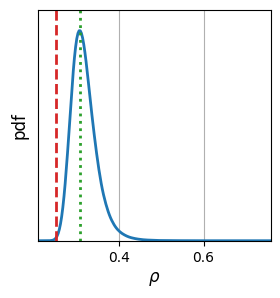

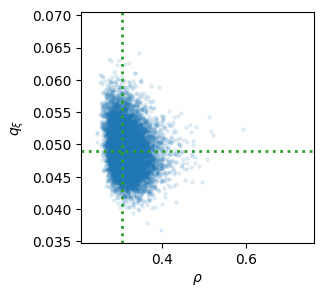

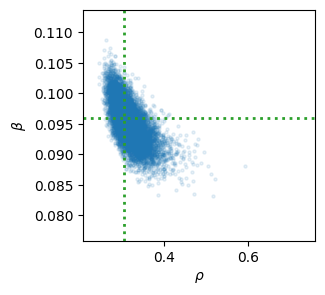

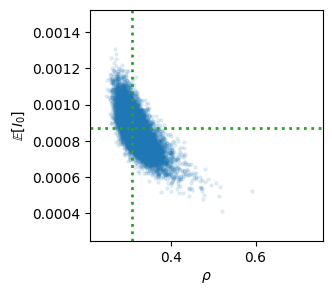

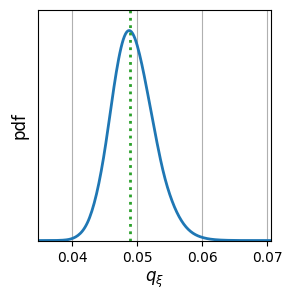

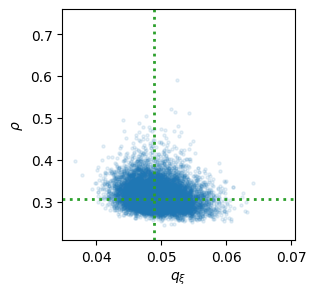

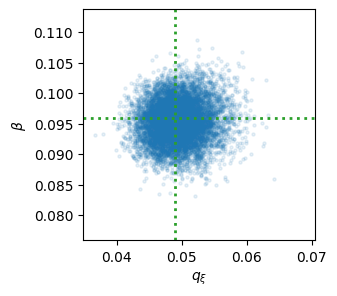

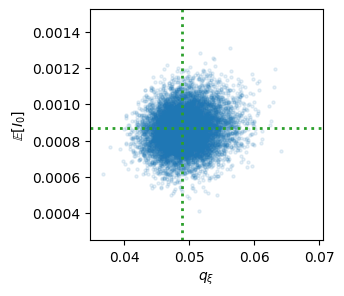

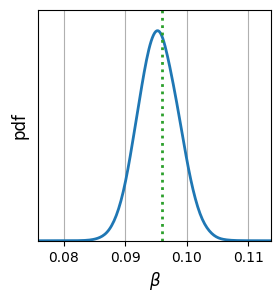

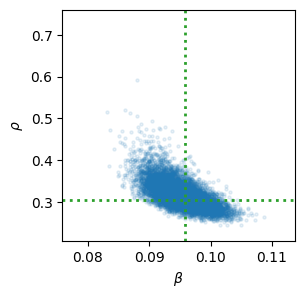

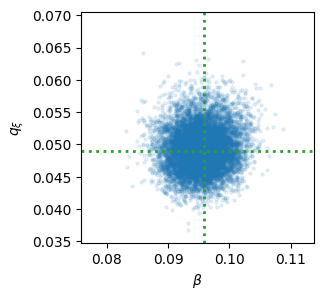

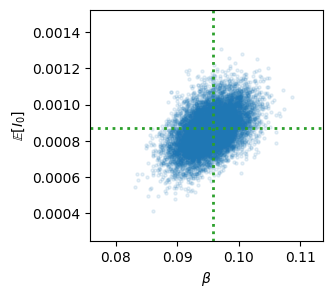

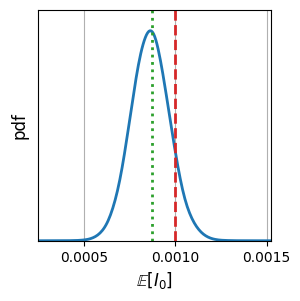

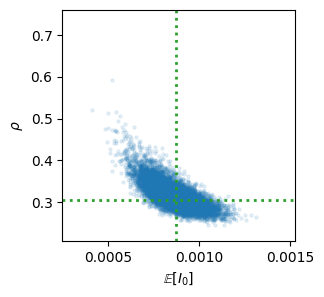

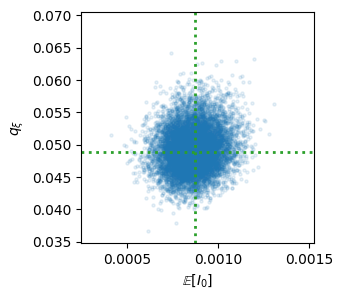

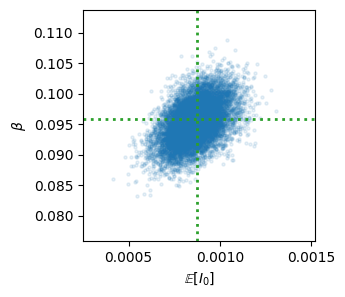

In [2]:
## Model 1

samples = np.loadtxt('chains/Model1-posterior.dat')
priors = np.loadtxt('chains/Model1-prior.dat')
maps = np.loadtxt('chains/Model1-map.dat')
label_2 = [r'$\rho$',r'$q_\xi$',r'$\beta$','$\mathbb{E}[I_0]$']
true = [0.25,0.005,0.12,0.001]
Npar = len(samples[:,0])


# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,param_true, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
# maps = res.x
# #np.savetxt('Case01Model2-map.dat')

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  if ii != 2:
    plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/m1_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])
      
      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xlabel(label_2[ii])
      plt.ylabel(label_2[jj])
      plt.savefig('figures/m1_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()

(4, 500000)
Optimization terminated successfully.
         Current function value: -918077.773653
         Iterations: 107
         Function evaluations: 203
0.2382794374800514 0.04276941018604666 0.2662147751432163
0.0025438725404063212 0.00040652604129622874 0.004895474972241708
0.12142798159266648 0.030748631171112643 0.12228762360527488
0.0010951782522224892 0.00015727314872806294 0.0009853442867575068


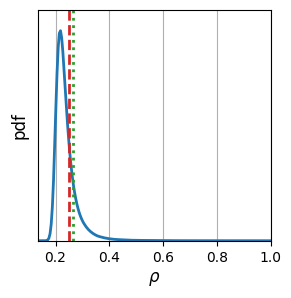

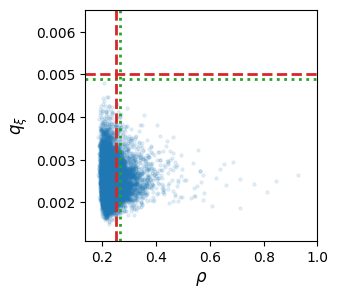

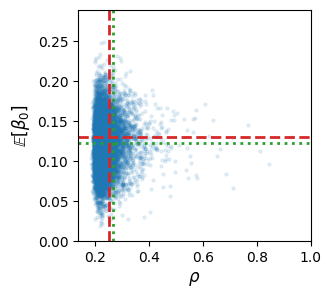

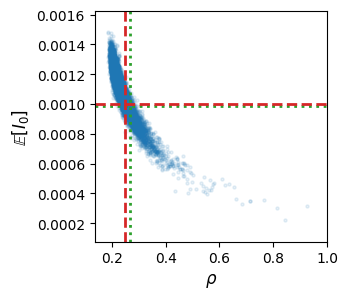

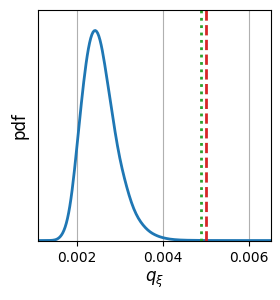

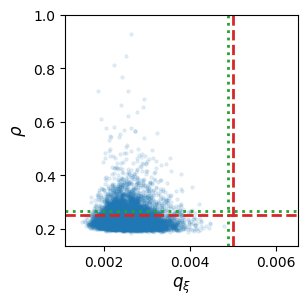

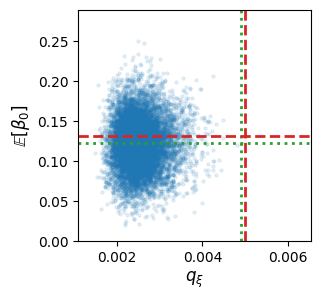

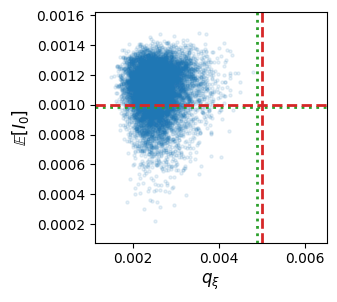

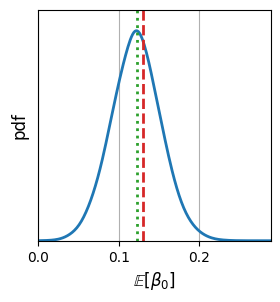

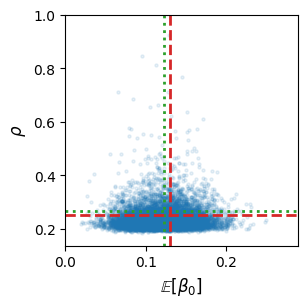

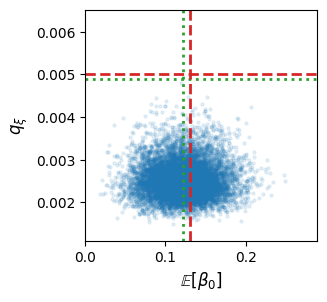

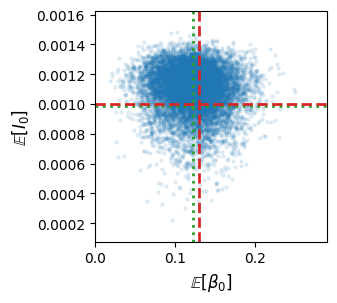

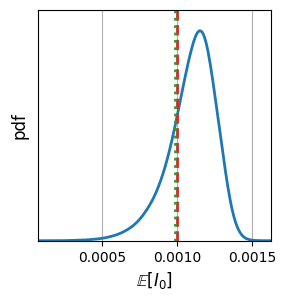

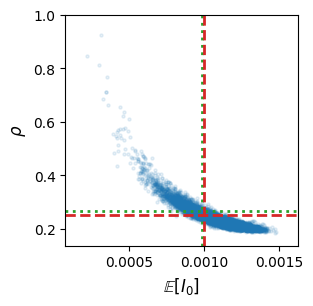

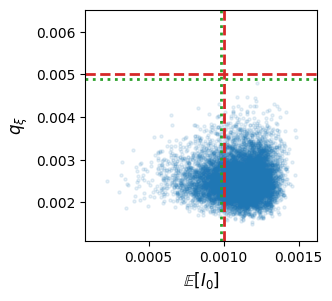

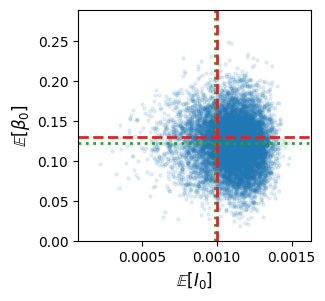

In [3]:
## Model 4

samples = np.loadtxt('chains/Model4-posterior.dat')
print(samples.shape)
priors = np.loadtxt('chains/Model4-prior.dat')
maps = np.loadtxt('chains/Model4-map.dat')
label_2 = [r'$\rho$',r'$q_\xi$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
true = [0.25,0.005,0.1303,0.001]
Npar = len(samples[:,0])

# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,[0.25,0.005,0.12,0.001], method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# # print(res.x)
# maps = res.x
# np.savetxt('chains/Model4-map.dat',maps)

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/m4_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2,linestyle='--')
      plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2,linestyle='--')
      plt.xlabel(label_2[ii], fontsize=12)
      plt.ylabel(label_2[jj], fontsize=12)
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.savefig('figures/m4_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()